In [72]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from PhysPropWater import lamb, mu, rho, Cp

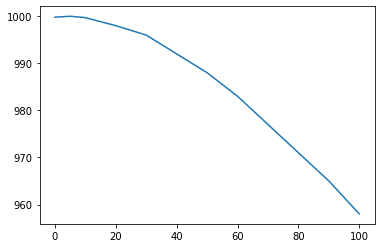

In [73]:
plt.plot(rho[:, 0], rho[:, 1])
plt.show()

In [74]:
x_rho = rho[:, 0]
y_rho = rho[:, 1]
X_rho = np.array([x_rho, np.ones(len(x_rho))]).T
print(f"X_rho = {X_rho}")
print(f"x_rho.T = {x_rho.T}")
XT_X_inv = np.linalg.inv(X_rho.T @ X_rho)
XT_X_inv

X_rho = [[  0.   1.]
 [  5.   1.]
 [ 10.   1.]
 [ 20.   1.]
 [ 30.   1.]
 [ 40.   1.]
 [ 50.   1.]
 [ 60.   1.]
 [ 70.   1.]
 [ 80.   1.]
 [ 90.   1.]
 [100.   1.]]
x_rho.T = [  0.   5.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


array([[ 7.77831794e-05, -3.59747205e-03],
       [-3.59747205e-03,  2.49716415e-01]])

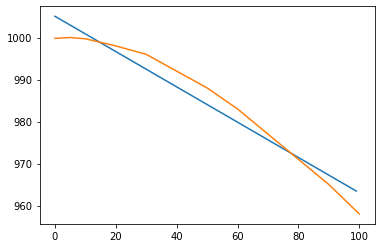

In [75]:
p = XT_X_inv @ X_rho.T @ y_rho

x_values = range(0, 100)
plt.plot(x_values, p[0] * x_values + p[1], label="Linear Regression")
plt.plot(x_rho, y_rho, label="Data")
plt.show()

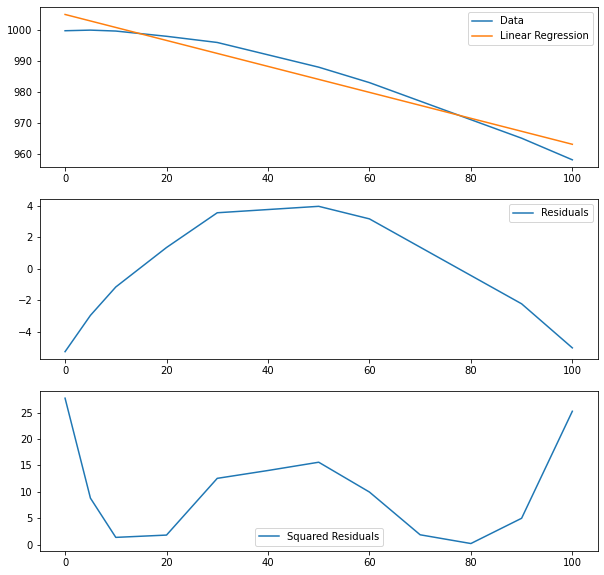

In [76]:
y_fit = np.polyfit(x_rho, y_rho, 1)
y_fit_fn = np.poly1d(y_fit)
residuals = y_rho - y_fit_fn(x_rho)
sum_of_squares = np.sum(residuals ** 2)


fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].plot(x_rho, y_rho, label="Data")
axs[0].plot(x_rho, y_fit_fn(x_rho), label="Linear Regression")
axs[0].legend()

axs[1].plot(x_rho, residuals, label="Residuals")
axs[1].legend()

axs[2].plot(x_rho, residuals ** 2, label="Squared Residuals")
axs[2].legend()
plt.show()

In [77]:
print(f"p: {p}" + "\n")
sigma_squared = sum_of_squares / (len(x_rho) - 2)
print(f"sigma_squared: {sigma_squared}" + "\n")

print(f"XT_X_inv: {XT_X_inv}" + "\n")
print(f"shape of XT_X_inv: {XT_X_inv.shape}" + "\n")

print(f"sigma*XT_inv: {sigma_squared * XT_X_inv}" + "\n")

s_p = np.sqrt(sigma_squared * XT_X_inv)
print(f"s_p = {s_p}"+ "\n")

T_inv = stats.t.ppf(0.95, len(x_rho) - 2)
print(f"T_inv: {T_inv}" + "\n")

sp_Tinv = s_p * T_inv
print(f"sp_Tinv: {sp_Tinv}" + "\n")

p: [-4.20408362e-01  1.00506889e+03]

sigma_squared: 12.418785610111891

XT_X_inv: [[ 7.77831794e-05 -3.59747205e-03]
 [-3.59747205e-03  2.49716415e-01]]

shape of XT_X_inv: (2, 2)

sigma*XT_inv: [[ 9.65972629e-04 -4.46762341e-02]
 [-4.46762341e-02  3.10117463e+00]]

s_p = [[0.0310801         nan]
 [       nan 1.76101523]]

T_inv: 1.8124611228107335

sp_Tinv: [[0.05633147        nan]
 [       nan 3.19177163]]



C:\Users\olofs\AppData\Local\Temp\ipykernel_25820\2563423997.py:10: RuntimeWarning: invalid value encountered in sqrt
  s_p = np.sqrt(sigma_squared * XT_X_inv)


In [78]:
p1_confidence_interval = np.array([p[0] - sp_Tinv[0, 0], p[0] + sp_Tinv[0, 0]])
print(f"p1_confidence_interval: {p1_confidence_interval}" + "\n")

p2_confidence_interval = np.array([p[1] - sp_Tinv[1, 1], p[1] + sp_Tinv[1, 1]])
print(f"p2_confidence_interval: {p2_confidence_interval}" + "\n")

p1_confidence_interval: [-0.47673984 -0.36407689]

p2_confidence_interval: [1001.87711509 1008.26065836]



In [109]:
s = np.sqrt(np.sum(residuals ** 2) / (len(x_rho) - 2))
print(f"s: {s}")
first_sqrt = [np.sqrt(x @ XT_X_inv @ x.T) for x in X_rho]
print(f"first_sqrt: {first_sqrt}" + "\n")

second_sqrt = np.sqrt(2*stats.f.ppf(0.05, 2, len(x_rho) - 2))
print(f"second_sqrt: {second_sqrt}" + "\n")

plus_minuses = s*second_sqrt*np.array(first_sqrt)
print(f"plus_minus: {plus_minuses}")

s: 3.5240297402422542
first_sqrt: [0.4997163350259991, 0.46442036401282394, 0.4307496865897457, 0.3700416265503156, 0.32229327349532727, 0.2938906918875722, 0.2905635202386382, 0.3131121455425748, 0.3566621762348386, 0.41464832823051284, 0.48188712384710874, 0.5550259453686915]

second_sqrt: 0.3211146106600586

plus_minus: [0.56548772 0.52554618 0.48744386 0.41874556 0.36471269 0.33257183
 0.32880675 0.35432316 0.40360514 0.46922328 0.54531187 0.62807704]


In [111]:
xps = X_rho @ p
print(f"xp: {xps}")

print(f"y_rho: {y_rho}")
pred_y_interval = np.array([[xp - plus_minus, xp + plus_minus] for xp, plus_minus in zip(xps, plus_minuses)])
print(f"pred_y_interval: {pred_y_interval}")

xp: [1005.06888673 1002.96684492 1000.86480311  996.66071949  992.45663588
  988.25255226  984.04846864  979.84438503  975.64030141  971.43621779
  967.23213418  963.02805056]
y_rho: [ 999.8 1000.   999.7  998.   996.   992.   988.   983.   977.   971.
  965.   958. ]
pred_y_interval: [[1004.50339900948, 1005.6343744470101], [1002.4412987373105, 1003.4923911022618], [1000.3773592545725, 1001.3522469680819], [996.2419739370221, 997.0794650517969], [992.0919231890567, 992.8213485659265], [987.9199804287701, 988.5851240923774], [983.7196618973096, 984.3772753900025], [979.4900618627951, 980.1987081906814], [975.2366962717207, 976.0439065479201], [970.9669945140427, 971.9054410717627], [966.6868223034954, 967.7774460484742], [962.3999735207497, 963.6561275973845]]
